# Tabular Data

In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


## Dataset preparation

In [6]:
# Loading data directly from CatBoost
from catboost.datasets import amazon

X, Xt = amazon()

y = X["ACTION"].apply(lambda x: 1 if x == 1 else 0).values
X.drop(["ACTION"], axis=1, inplace=True)

In [8]:
X.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325


## Creating custom activations

In [2]:
from tensorflow import keras as keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def gelu(x):
    return 0.5 * x * (1 + tf.tanh(tf.sqrt(2 / np.pi) * (x + 0.044715 * tf.pow(x, 3))))

keras.utils.get_custom_objects().update({'gelu': keras.layers.Activation(gelu)})

In [4]:
def mish(inputs):
    return inputs * tf.math.tanh(tf.math.softplus(inputs))

keras.utils.get_custom_objects().update({'mish': keras.layers.Activation(mish)})

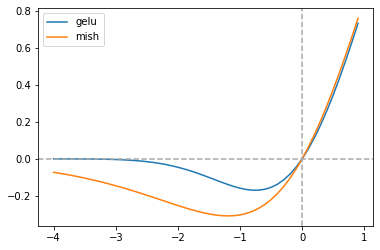

In [5]:
gelu_vals = list()
mish_vals = list()
abscissa = np.arange(-4, 1, 0.1)
for val in abscissa:
    gelu_vals.append(gelu(tf.cast(val, tf.float32)).numpy())
    mish_vals.append(mish(tf.cast(val, tf.float32)).numpy())
    
plt.plot(abscissa, gelu_vals, label='gelu')
plt.plot(abscissa, mish_vals, label='mish')
plt.axvline(x=0.0, linestyle='--', color='darkgray')
plt.axhline(y=0.0, linestyle='--', color='darkgray')
plt.legend()
plt.show()